In [48]:
pwd

'/home/jupyter-swathi/SNN_fork'

In [ ]:
import pickle as pkl
RNN_runs = {}
for k in range(1,9):
    file_path = f'./data/storage/RNN_train_k_{k}.pkl'
    with open(file_path, 'rb') as file:
            data = pkl.load(file)
            RNN_runs.update(data)

import pickle as pkl
RNN_levy_runs = {}
file_path = f'./data/storage/RNN_train_k_levy.pkl'
with open(file_path, 'rb') as file:
        data = pkl.load(file)
        RNN_levy_runs = data


import pickle as pkl
file_path = f'./data/storage/classifier_accuracies.pkl'
with open(file_path, 'rb') as file:
        NLF_runs = pkl.load(file)

file_path = f'./data/storage/classifier_accuracies_levy.pkl'
with open(file_path, 'rb') as file:
        NLF_runs_levy = pkl.load(file)

file_path = f'./data/storage/classifier_accuracies_500steps_levy.pkl'
with open(file_path, 'rb') as file:
        NLF_runs_500steps_levy = pkl.load(file)
        
    

In [54]:
# Convert the dictionary to a DataFrame
NLF_df = pd.DataFrame([(k[0], k[1], k[2], v) for k, v in NLF_runs.items()], columns=['train', 'winsize', 'test', 'accuracy'])
NLF_levy_df = pd.DataFrame([(k[0], k[1], k[2], v) for k, v in NLF_runs_levy.items()], columns=['train', 'winsize', 'test', 'accuracy'])
NLF_levy_500steps_df = pd.DataFrame([(k[0], k[1], k[2], v) for k, v in NLF_runs_500steps_levy.items()], columns=['train', 'winsize', 'test', 'accuracy'])

# Display the DataFrame
NLF_levy_df.head()
# Display the DataFrame
NLF_levy_df.head()

,train,winsize,test,accuracy
0,levy,2,1,0.725
1,levy,2,2,0.739
2,levy,2,3,0.738
3,levy,2,4,0.737
4,levy,2,5,0.744


In [56]:
RNN_levy_runs

{('levy', 1): 73.125,
 ('levy', 2): 72.7125,
 ('levy', 3): 72.88125,
 ('levy', 4): 73.5375,
 ('levy', 5): 73.18124999999999,
 ('levy', 6): 73.425,
 ('levy', 7): 74.8125,
 ('levy', 8): 75.43125}

# Imports

In [58]:
from multisensory_playbook import (
    ClassicalTask,
    DetectionTask,
    DetectionTask_versatile,
    LinearClassifier,
    Trials)

#full_trials_test_list = [task.generate_trials(nb_trials, nb_steps+k-1) for k,task in enumerate(tasks)]
#full_trials_test_list = [task.generate_trials(nb_trials, nb_steps+k-1) for k,task in enumerate(tasks)]#import pickle
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from scipy.optimize import fsolve
import joblib
root = Path("./data/")

# Hyperparameters

In [9]:
# "s_range": [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # Sparse to Dense, sparse is less than 0.2
def calc_pe(pe_precursor, k):
    """
    Calculate effective pe, given an input pe and on-length k
    """
    pe = 1 - ((1 - pe_precursor) ** k)
    return pe

def calc_precursor_pe(pe, k):
    """
    Calculate pe, given an effective pe and on-length k
    """
    precursor_pe= 1 - ((1-pe)**(1/k))
    return precursor_pe

def calculate_pg(ff, k, N=90, correction=1):
    """
    Use ff to calulate pg, given a k and N
    ff: desired filtered fraction of E 
    pg: probability of E(t)=1 in the base_e (generator)
    k : local on-time duration
    N : number time-steps
    """
    buffer = k
    #pg = (1-fsolve(lambda x: ff-(1-x**k)/(1-x**(N)), 0.9))[0] 
    if correction:
        ff = (1-fsolve(lambda x: ff-(1-x**k)/(1-x**(N+int(buffer)-1*(k-1))), 0.9))[0]

    return ff
    
# Tasks
# Detection task, old formulation
pe_dense = 0.3
pe_sparse = 0.04
nb_steps = 200 
# Detection task, new versatile formulation
time_dep = 1 # 1: there is time dependence
#k = 3 # if e_t=1, then e_(t+1)=1 and e_(t+2)=1

pm=1
pc = 0.45
"""
task_keys = []
for kk in range(1,9):
    #task_keys.append(f"Dense Det_{kk}")
    task_keys.append(f"Sparse Det_{kk}")
"""
#task_keys = ['Classical']
#save_path = root / f"ideal_data_{pe_sparse}sparse"
task_keys = ['Sparse Det_1',
 'Sparse Det_2',
 'Sparse Det_3',
 'Sparse Det_4',
 #'Sparse Det_5',
 'Sparse Det_6',
 #'Sparse Det_7',
 'Sparse Det_8']
tasks = [
    
    #ClassicalTask(s=0.1),  # classical task

    
    #DetectionTask(pm=pm, pe=pe_dense, pc=0.28, pn=1 / 3, pi=0.01),  # dense
    ##DetectionTask_versatile(pm=pm, pe=calc_precursor_pe(pe_dense, 1), pc=0.28, pn=1 / 3, pi=0.01, time_dep=time_dep, k=1), # dense
    ##DetectionTask_versatile(pm=pm, pe=calc_precursor_pe(pe_dense, 2), pc=0.28, pn=1 / 3, pi=0.01, time_dep=time_dep, k=2), # dense
    ##DetectionTask_versatile(pm=pm, pe=calc_precursor_pe(pe_dense, 3), pc=0.28, pn=1 / 3, pi=0.01, time_dep=time_dep, k=3), # dense

    DetectionTask_versatile(pm=pm, pe=calculate_pg(pe_sparse,  N=nb_steps+1-1, k=1), pc=pc, pn=1 / 3, pi=0.01, time_dep=time_dep, k=1), # sparse    
    DetectionTask_versatile(pm=pm, pe=calculate_pg(pe_sparse,  N=nb_steps+2-1,k=2), pc=pc, pn=1 / 3, pi=0.01, time_dep=time_dep, k=2), # sparse  
    DetectionTask_versatile(pm=pm, pe=calculate_pg(pe_sparse,  N=nb_steps+3-1,k=3), pc=pc, pn=1 / 3, pi=0.01, time_dep=time_dep, k=3), # sparse
    #DetectionTask_versatile(pm=pm, pe=calculate_pg(pe_sparse,  N=nb_steps+4-1,k=4), pc=pc, pn=1 / 3, pi=0.01, time_dep=time_dep, k=4), # sparse
    #DetectionTask_versatile(pm=pm, pe=calculate_pg(pe_sparse,  N=nb_steps+5-1,k=5), pc=pc, pn=1 / 3, pi=0.01, time_dep=time_dep, k=5), # sparse 
    #DetectionTask_versatile(pm=pm, pe=calculate_pg(pe_sparse,  N=nb_steps+6-1,k=6), pc=pc, pn=1 / 3, pi=0.01, time_dep=time_dep, k=6), # sparse 
    #DetectionTask_versatile(pm=pm, pe=calculate_pg(pe_sparse,  N=nb_steps+7-1,k=7), pc=pc, pn=1 / 3, pi=0.01, time_dep=time_dep, k=7), # sparse
    #DetectionTask_versatile(pm=pm, pe=calculate_pg(pe_sparse,  N=nb_steps+8-1,k=8), pc=pc, pn=1 / 3, pi=0.01, time_dep=time_dep, k=8) # sparse
    
]



nb_trials = 1000#00 # Original: 100000

classifier_type = LinearClassifier
# Sparsity values
sparsity = {}
#sparsity['Dense detection'] = pe_dense
#sparsity['Sparse detection'] = pe_sparse


# Analysis

In [24]:

full_trials_test_list = [task.generate_trials(nb_trials, nb_steps+k+1-1) for k,task in enumerate(tasks)]
ta = tasks[0]
ta

DetectionTask_versatile(pm=1, pe=0.039989045971137616, pn=0.3333333333333333, pc=0.45, pi=0.01, trans_prob=None, time_dep=1, k=1, random_seed=None, do_return=True)

In [5]:
task_keys #= ['Sparse Det_1']

['Sparse Det_1',
 'Sparse Det_2',
 'Sparse Det_3',
 'Sparse Det_4',
 'Sparse Det_6',
 'Sparse Det_8']

In [6]:
ideal_dict = {}
windowsize_list = [3]
k_list = [1]#[1,2,4,6,8]
modelpath = './data/'
for a, task in enumerate(tasks):
    k = k_list[a]
    print(a, k, task)

    full_trials_train = task.generate_trials(nb_trials, nb_steps+k-1)
    full_trials_test = task.generate_trials(nb_trials, nb_steps+k-1)

    print('Train-Test generated') # logging

    # Generate test data separately
    training_size = nb_trials
    testing_size = nb_trials
    training_trials = Trials(
        repeats=training_size,
        time_steps=nb_steps+k-1,
        M=full_trials_train.M,
        A=full_trials_train.A,
        V=full_trials_train.V,
        task=task
    )

    testing_trials = Trials(
        repeats=testing_size,
        time_steps=nb_steps+k-1,
        M=full_trials_test.M,
        A=full_trials_test.A,
        V=full_trials_test.V,
        task=task
    )

    # Calculate accuracy
    accs_tmp = []

    for pairs in [0,1]:
         
        if pairs in [0,1]:
            classifier = LinearClassifier(task, pair=pairs)
  
            # Train and test the classifier using trials generated using sliding window features
            trained_classifier = classifier.train(training_trials)
            res = trained_classifier.test(testing_trials)
            accs_tmp.append(res.accuracy)
            print(accs_tmp)
        if pairs == 2:
            for ws in windowsize_list:
                classifier = LinearClassifier(task, pairs=pairs, windowsize=ws)
    
                # Train and test the classifier using trials generated using sliding window features
                trained_classifier = classifier.train(training_trials)
                #trained_classifier.save_model(modelpath)
                #res = trained_classifier.test(testing_trials)
                #accs_tmp.append(res.accuracy)
                #print(accs_tmp)
    ideal_dict[task_keys[a]] = accs_tmp


0 1 ClassicalTask(s=0.1)
Train-Test generated


TypeError: LinearClassifier.__init__() got an unexpected keyword argument 'pair'

In [179]:
#trained_k1 = trained_classifier


,C 0.1,C 0.2,C 0.3,C 0.4,C 0.5,S 0.1,S 0.2,S 0.3,S 0.4,S 0.5
0,0.991,1.0,1.0,1.0,1.0,1.000,1.0,1.0,1.0,1.0
1,0.989,1.0,1.0,1.0,1.0,0.999,1.0,1.0,1.0,1.0


### Generalisation

In [1]:
from Task_Space_AF_Comparisons_Playbook.ipynb import build_input_layer

ModuleNotFoundError: No module named 'Task_Space_AF_Comparisons_Playbook'

In [146]:
ideal_dict_NLF3_k1 = {}
windowsize_list = [3]
k_list = [1,2,3,4,6,8]
modelpath = './data/'
for a, task in enumerate(tasks):
    k = k_list[a]
    print(a, k, task)

    full_trials_test = task.generate_trials(nb_trials, nb_steps+k-1)

    print('Train-Test generated') # logging

    # Generate test data separately
    testing_size = nb_trials
    
    testing_trials = Trials(
        repeats=testing_size,
        time_steps=nb_steps+k-1,
        M=full_trials_test.M,
        A=full_trials_test.A,
        V=full_trials_test.V,
        task=task
    )

    # Calculate accuracy
    accs_tmp = []

    for pairs in [2]:
         if pairs == 2:
            for ws in windowsize_list:
                classifier = trained_k1
                res = classifier.test(testing_trials)
                accs_tmp.append(res.accuracy)
                print(accs_tmp)
    ideal_dict_NLF3_k1[task_keys[a]] = accs_tmp


0 1 DetectionTask_versatile(pm=1, pe=0.039989045971137616, pn=0.3333333333333333, pc=0.45, pi=0.01, trans_prob=None, time_dep=1, k=1, random_seed=None, do_return=True)
Train-Test generated
win size:  3
[0.726]
1 2 DetectionTask_versatile(pm=1, pe=0.019848430653309435, pn=0.3333333333333333, pc=0.45, pi=0.01, trans_prob=None, time_dep=1, k=2, random_seed=None, do_return=True)
Train-Test generated
win size:  3
[0.723]
2 3 DetectionTask_versatile(pm=1, pe=0.008260569886639257, pn=0.3333333333333333, pc=0.45, pi=0.01, trans_prob=None, time_dep=1, k=4, random_seed=None, do_return=True)
Train-Test generated
win size:  3
[0.72]
3 4 DetectionTask_versatile(pm=1, pe=0.003366867396965345, pn=0.3333333333333333, pc=0.45, pi=0.01, trans_prob=None, time_dep=1, k=6, random_seed=None, do_return=True)
Train-Test generated
win size:  3
[0.725]
4 6 DetectionTask_versatile(pm=1, pe=0.00039493763738907006, pn=0.3333333333333333, pc=0.45, pi=0.01, trans_prob=None, time_dep=1, k=8, random_seed=None, do_retu

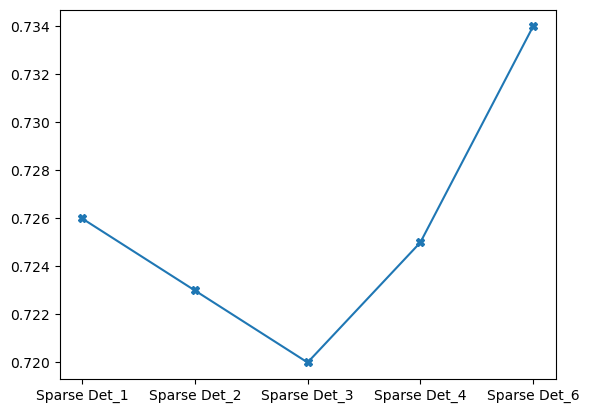

In [147]:
#plt.plot(ideal_dict_NLF3.keys(),ideal_dict_NLF3.values(), marker='X')
plt.plot(ideal_dict_NLF3_k1.keys(),ideal_dict_NLF3_k1.values(), marker='X')

In [148]:
ideal_dict_NLF3_k1

{'Sparse Det_1': [0.726],
 'Sparse Det_2': [0.723],
 'Sparse Det_3': [0.72],
 'Sparse Det_4': [0.725],
 'Sparse Det_6': [0.734]}

In [ ]:
plt.plot(ideal_dict.keys(),ideal_dict.values(), marker='x') # k=8: 0.738 win4
plt.ylim(.65,.8)
plt.grid()

In [ ]:
ideal_dict # k=8: 0.738 win 
"""{'Sparse Det_1': [0.924],
 'Sparse Det_2': [0.924],
 'Sparse Det_3': [0.901],
 'Sparse Det_4': [0.861],
 'Sparse Det_5': [0.822],
 'Sparse Det_6': [0.789],
 'Sparse Det_7': [0.761],
 'Sparse Det_8': [0.737]}"""

In [61]:
data_df = pd.DataFrame(ideal_dict).transpose()

data_df.rename(columns={0:'LF', 1:'NLF_1', 2:'NLF_2', 3:'NLF_3'}, inplace=True)

data_df

,LF,NLF_1,NLF_2,NLF_3
Sparse Det_1,0.727,0.732,0.732,0.728
Sparse Det_2,0.718,0.723,0.735,0.732
Sparse Det_4,0.719,0.722,0.743,0.759
Sparse Det_6,0.722,0.727,0.758,0.781
Sparse Det_8,0.726,0.732,0.768,0.797


In [17]:
data_df.to_csv('./data/idea_data/ideal_data_sparse:pc=0.15_buffer=1_re-gen=1_k8-correction=1.csv', index=1)

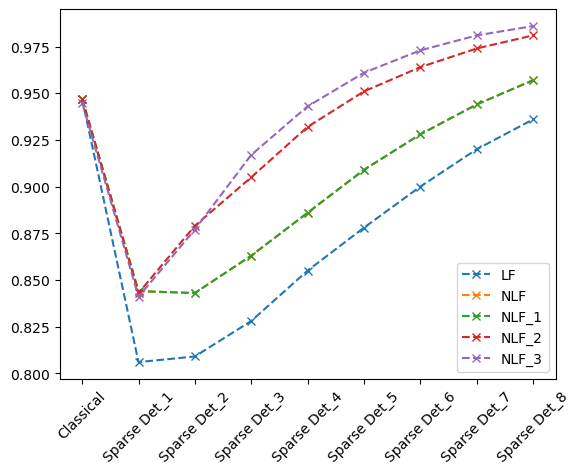

In [183]:
df = pd.read_csv('./data/idea_data/ideal_data_sparse.csv')
# Set the 'Unnamed: 0' column as the index and rename it to 'task'
df.set_index('Unnamed: 0', inplace=True)
df.index.name = 'task'

plt.plot(df, ls='--', marker='x', label=df.columns)
plt.xticks(rotation=45)
plt.legend()

## data_df

In [83]:
RNN = [73.30624999999999, 73.0125, 74.65625, 79.84375, 83.35000000000001]
data_df['RNN'] = [el/100 for el in RNN]
data_df

,LF,NLF_1,NLF_2,NLF_3,RNN
Sparse Det_1,0.727,0.732,0.732,0.728,0.733062
Sparse Det_2,0.718,0.723,0.735,0.732,0.730125
Sparse Det_4,0.719,0.722,0.743,0.759,0.746563
Sparse Det_6,0.722,0.727,0.758,0.781,0.798438
Sparse Det_8,0.726,0.732,0.768,0.797,0.833500


In [71]:
data_df = pd.DataFrame(data_dict)
data_df

,LF,NLF_1,NLF_2,NLF_3,RNN
Sparse Det_1,0.727,0.732,0.732,0.728,0.733062
Sparse Det_2,0.718,0.723,0.735,0.732,0.730125
Sparse Det_4,0.719,0.722,0.743,0.759,0.746563
Sparse Det_6,0.722,0.727,0.758,0.781,0.798438
Sparse Det_8,0.726,0.732,0.768,0.797,0.833500


In [59]:
data_dict = {
    "LF": {
        "Sparse Det_1": 0.727,
        "Sparse Det_2": 0.718,
        "Sparse Det_4": 0.719,
        "Sparse Det_6": 0.722,
        "Sparse Det_8": 0.726,
    },
    "NLF_1": {
        "Sparse Det_1": 0.732,
        "Sparse Det_2": 0.723,
        "Sparse Det_4": 0.722,
        "Sparse Det_6": 0.727,
        "Sparse Det_8": 0.732,
    },
    "NLF_2": {
        "Sparse Det_1": 0.732,
        "Sparse Det_2": 0.735,
        "Sparse Det_4": 0.743,
        "Sparse Det_6": 0.758,
        "Sparse Det_8": 0.768,
    }
,
    "NLF_3": {
        "Sparse Det_1": 0.728,
        "Sparse Det_2": 0.732,
        "Sparse Det_4": 0.759,
        "Sparse Det_6": 0.781,
        "Sparse Det_8": 0.797,
    },
    "RNN": {
        "Sparse Det_1": 0.733062,
        "Sparse Det_2": 0.730125,
        "Sparse Det_4": 0.746563,
        "Sparse Det_6": 0.798438,
        "Sparse Det_8": 0.833500,
    }
}


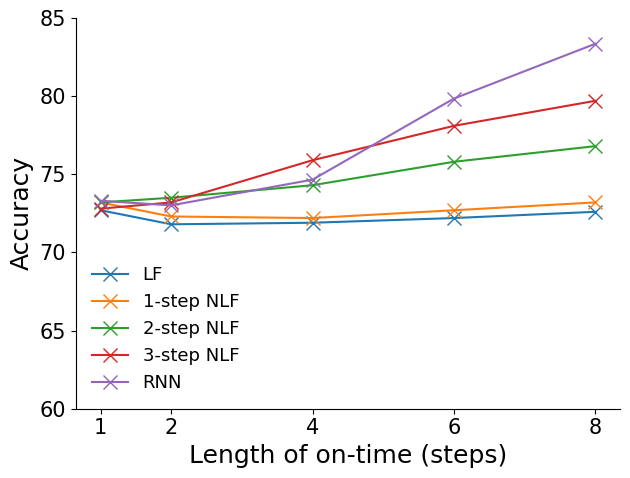

In [83]:
df = pd.DataFrame(data_dict)

x_ticks = [1, 2, 4, 6, 8]
new_labels = ['LF', '1-step NLF', '2-step NLF', '3-step NLF', 'RNN']
cols =['LF', 'NLF_1', 'NLF_2', 'NLF_3', 'RNN']

for col, new_label in zip(cols, new_labels):
    plt.plot(x_ticks, df[col] * 100, ls='-', marker='x', label=new_label, markersize=10)

#plt.plot(x_ticks, df.iloc[:]*100, ls='-', marker='x', label=cols, markersize=10)#data_df.columns)
plt.legend(frameon=0,fontsize=13,loc=3)
plt.xticks(x_ticks, label=[1,2,4,6,8])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.ylabel('Accuracy', fontsize=18)
plt.xlabel('Length of on-time (steps)', fontsize=18)
ax = plt.gca()  # Get current axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.ylim(bottom=60, top=85)
plt.savefig('basiccompare.png', dpi=500, format='png')

In [27]:
RNN = [73.30624999999999, 73.0125, 74.65625, 79.84375, 83.35000000000001]
data_df['RNN'] = [el/100 for el in RNN]
data_df

NameError: name 'data_df' is not defined

In [74]:
ideal_dict_NLF3_k3

{'Sparse Det_1': [0.702],
 'Sparse Det_2': [0.726],
 'Sparse Det_3': [0.749],
 'Sparse Det_4': [0.761],
 'Sparse Det_6': [0.771],
 'Sparse Det_8': [0.792]}

In [ ]:
{'Sparse Det_1': [0.715],
 'Sparse Det_2': [0.737],
 'Sparse Det_4': [0.737],
 'Sparse Det_6': [0.746],
 'Sparse Det_8': [0.757]}

In [118]:
ideal_dict_NLF3_list = [69.5, 71.5, 76.1, 77.7, 79.7]
ideal_dict_NLF3_k6_list = [68.3, 71., 76.2, 77.8, 79.8]
ideal_dict_NLF3_k2_list = [71.5, 73.7, 73.7, 74.6, 75.7]
ideal_dict_NLF3_k3_list = [70.2, 72.6, 76.1, 77.1, 79.2]
cols = ['NLF_2', 'NLF_3']
data_reduced = data_df[cols]
data_reduced

,NLF_2,NLF_3
Sparse Det_1,0.732,0.728
Sparse Det_2,0.735,0.732
Sparse Det_4,0.743,0.759
Sparse Det_6,0.758,0.781
Sparse Det_8,0.768,0.797


In [56]:

#cols = ['LF', 'NLF_1','NLF_2', 'NLF_3','RNN']
data_df
data_reduced

,NLF_2,NLF_3
Sparse Det_1,0.732,0.728
Sparse Det_2,0.735,0.732
Sparse Det_4,0.743,0.759
Sparse Det_6,0.758,0.781
Sparse Det_8,0.768,0.797


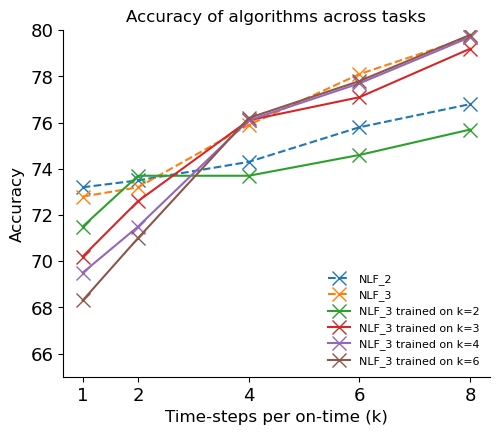

In [92]:
plt.figure(figsize=(5.5,4.5))#2.5
x_ticks = [1, 2, 4, 6, 8]

plt.plot(x_ticks, data_reduced.iloc[:]*100, ls='--', marker='x', label=cols, markersize=10)#data_df.columns)

plt.plot(x_ticks, ideal_dict_NLF3_k2_list, label='NLF_3 trained on k=2', marker='x',ls='-', markersize=10)
plt.plot(x_ticks, ideal_dict_NLF3_k3_list, label='NLF_3 trained on k=3', marker='x',ls='-', markersize=10)
plt.plot(x_ticks, ideal_dict_NLF3_list, label='NLF_3 trained on k=4', marker='x',ls='-', markersize=10)
plt.plot(x_ticks, ideal_dict_NLF3_k6_list, label='NLF_3 trained on k=6', marker='x',ls='-', markersize=10)

plt.yticks(fontsize=13)
plt.ylim(bottom=65, top=80)
plt.ylabel('Accuracy', fontsize=12)
#plt.grid()
# Removing top and right borders
ax = plt.gca()  # Get current axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Accuracy of algorithms across tasks')

plt.legend(frameon=0,fontsize=8,loc=4)
#plt.xticks(ticks=[1, 2, 4,6,8])#, labels=[1, 2, 4, 6, 8]);
plt.xlabel('Time-steps per on-time (k)', fontsize=12)
plt.xticks(ticks=x_ticks, labels=x_ticks, fontsize=13);

#plt.title('pc=0.5 pe=0.13 buffer=1, re-gen=1, k8-correc=1')
#plt.savefig('./Plots/pc=0.5_buffer=1_re-gen=1_k8-correction=1.png')

In [117]:
ideal_dict_NLF3_k2_list

array([72, 74, 77, 70, 79])

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample data (replace with your actual data)
x_ticks = [1, 2, 4, 6, 8]

# Combine data into a 2D array
data = np.array([data_reduced['NLF_2']*100, ideal_dict_NLF3_k2_list, 
                 ideal_dict_NLF3_k3_list, ideal_dict_NLF3_list, ideal_dict_NLF3_k6_list])

# Create a heatmap with specified color bar range
plt.figure(figsize=(5, 3)) # 10, 6
ax = sns.heatmap(data, annot=True, fmt=".1f", cmap="YlGnBu", xticklabels=x_ticks, yticklabels=[
    'NLF$_2$', 'NLF$_3$ k2-trained', 'NLF$_3$ k3-trained', 'NLF$_3$ k4-trained', 'NLF$_3$ k6-trained'],
    vmin=68, vmax=85)

plt.xlabel('Time-steps per on-time (k)', fontweight='bold')
plt.ylabel('Algorithm', fontweight='bold')
plt.title('Accuracy of algorithms across tasks')

plt.show()


NameError: name 'data_reduced' is not defined

In [42]:
# Sample data (replace with your actual data)
x_ticks = np.arange(1,9,1)# [1, 2, 4, 6, 8]

# Combine data into a 2D array
data = np.array([ideal_dict_NLF3_k2_list, 
                 ideal_dict_NLF3_k3_list, ideal_dict_NLF3_list, ideal_dict_NLF3_k6_list])

# Create a heatmap with specified color bar range
plt.figure(figsize=(10, 6))
ax = sns.heatmap(data, annot=True, fmt=".1f", cmap="YlGnBu", xticklabels=x_ticks, yticklabels=[
    '2', '3', '4', '6'],
    vmin=68, vmax=85)


plt.xlabel('Testing task on-time', fontweight='bold')
plt.ylabel('Training task on-time', fontweight='bold')
plt.title('Accuracy of 3-step NLF')

plt.show()

NameError: name 'ideal_dict_NLF3_k2_list' is not defined

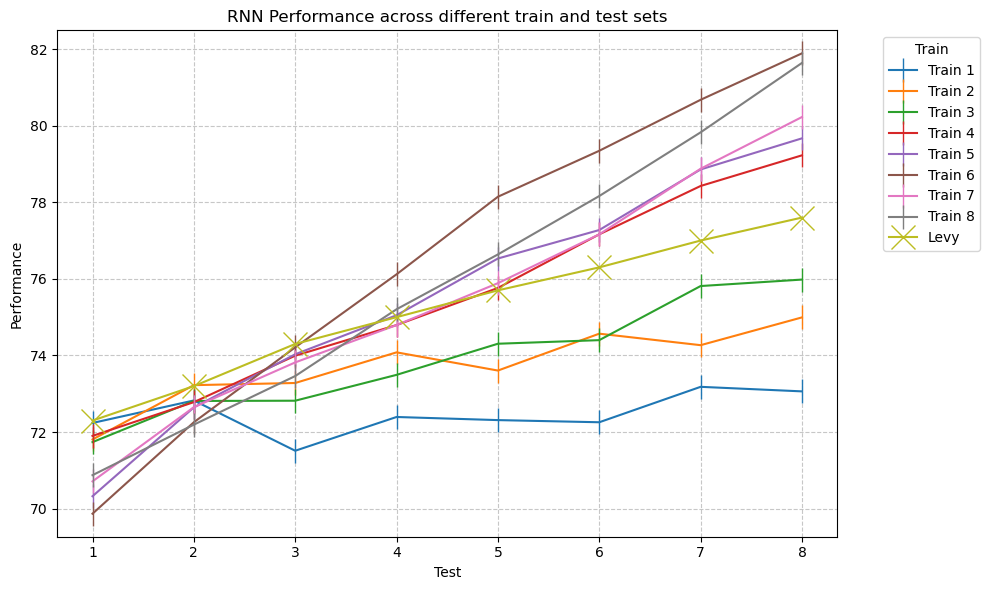

In [57]:
plt.figure(figsize=(10, 6))

# Plot each row (train) as a separate line
for i in range(1, 9):  # Assuming train values go from 1 to 8
    plt.plot(range(1, 9), heatmap_data.iloc[i-1], label=f'Train {i}', marker='|', ms=17)
plt.plot(df['test'], df['accuracy']*100, label='Levy', marker='x', ms=17)
# Customize the plot
plt.title('RNN Performance across different train and test sets')
plt.xlabel('Test')
plt.ylabel('Performance')
plt.legend(title='Train', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# Set x-axis ticks
plt.xticks(range(1, 9))

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

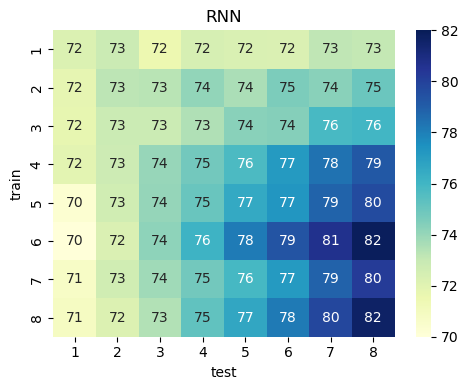

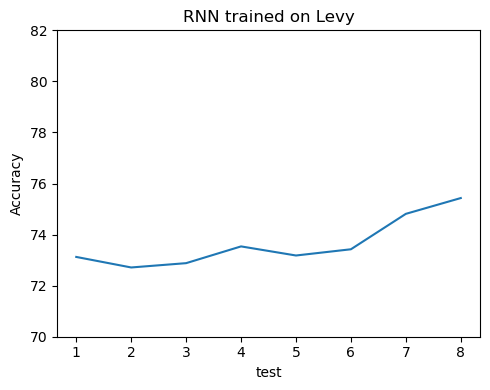

In [21]:

# Define common y-axis limits
y_min, y_max = 70, 82

# Plot the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", vmin=y_min, vmax=y_max)
plt.title('RNN')
#plt.colorbar(label='Accuracy')
plt.tight_layout()
plt.show()

# Transform dictionary into dataframe
df = pd.DataFrame([(k[0], k[1], v) for k, v in RNN_levy_runs.items()], columns=['train', 'test', 'accuracy'])

# Plot the line graph
plt.figure(figsize=(5, 4))
plt.title('RNN trained on Levy')
plt.xlabel('test')
plt.ylabel('Accuracy')
plt.plot(df['test'], df['accuracy'])
plt.ylim(y_min, y_max)
plt.tight_layout()
plt.show()

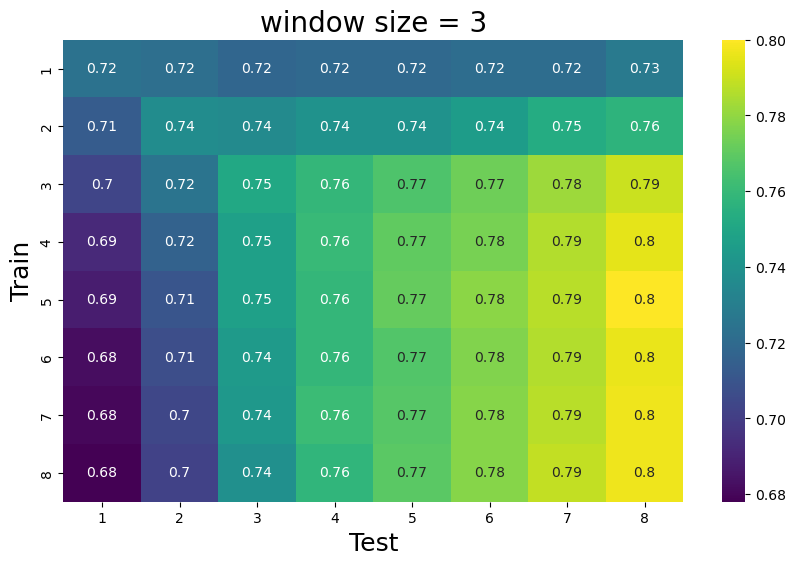

In [85]:
# Filter data for train value 2 and 3
df_train_2 = NLF_df[NLF_df['winsize'] == 2]
df_train_3 = NLF_df[NLF_df['winsize'] == 3]
ws = 3
for df in [df_train_3]:
    
    # Pivot the DataFrame
    pivot_df = df.pivot_table(index='train', columns='test', values='accuracy')
    
    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_df, annot=True, cmap="viridis")
    plt.title(f'window size = {ws}', fontsize=20)
    ws+=1
    plt.xlabel('Test', fontsize=18)
    plt.ylabel('Train', fontsize=18)
    plt.savefig('w3.png', dpi=500, format='png')
    plt.show()

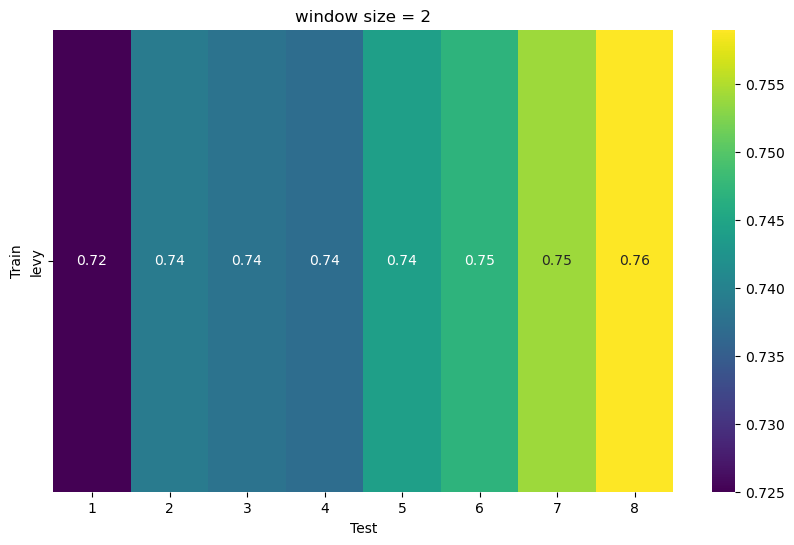

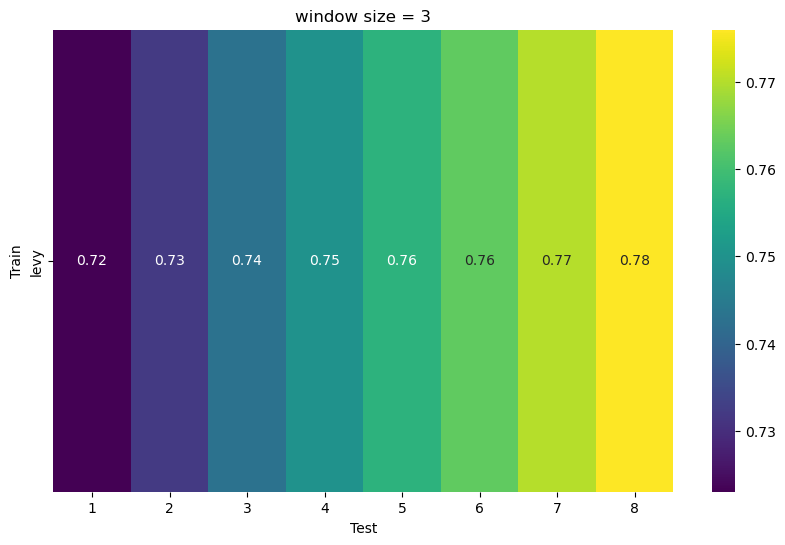

In [45]:
# Filter data for train value 2 and 3
df_train_levy_2 = NLF_levy_df[NLF_levy_df['winsize'] == 2]
df_train_levy_3 = NLF_levy_df[NLF_levy_df['winsize'] == 3]
ws = 2
for df in [df_train_levy_2, df_train_levy_3]:
    
    # Pivot the DataFrame
    pivot_df = df.pivot_table(index='train', columns='test', values='accuracy')
    
    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_df, annot=True, cmap="viridis")
    plt.title(f'window size = {ws}')
    ws+=1
    plt.xlabel('Test')
    plt.ylabel('Train')
    plt.show()

Text(0.5, 1.0, 'pc=0.7, buffer=1, re-gen=1, k8-correction=0')

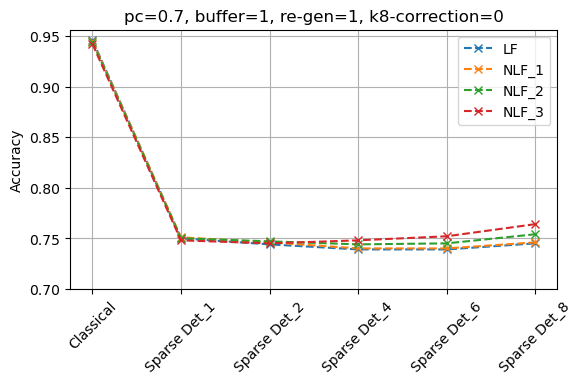

In [11]:
#df = pd.read_csv('./data/idea_data/ideal_data_sparse.csv')
# Set the 'Unnamed: 0' column as the index and rename it to 'task'
#df.set_index('Unnamed: 0', inplace=True)
#df.index.name = 'task'
plt.figure(figsize=(6,4))
plt.plot(data_df, ls='--', marker='x', label=data_df.columns)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout(pad=2.0)  # Add padding to ensure the title is not cut off
plt.ylabel('Accuracy')
plt.ylim(bottom=0.7)
plt.grid()
plt.title('pc=0.7, buffer=1, re-gen=1, k8-correction=0')
#plt.savefig('./Plots/pc=0.7_buffer=1_re-gen=1_k8-correction=0.png')

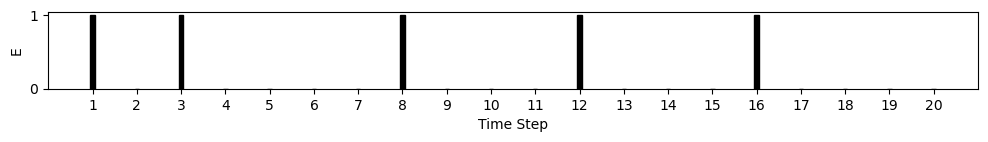

In [42]:
# Generate data with 20 time points and 5 signal points
time_steps = np.arange(1, 21)
signals = np.zeros(20)
signal_indices = [1, 3, 8, 12, 16]
signals[np.array(signal_indices) - 1] = 1  # Set signal value to 1 at the specified indices

# Create the plot using bar plot
plt.figure(figsize=(12, 1))
plt.bar(time_steps, signals, color='black', edgecolor='black', width=.1)
plt.xticks(time_steps)  # Ensure x-axis has 1 through 20
plt.yticks([0, 1])
plt.xlabel('Time Step')
plt.ylabel('E')
# Customize the plot


#plt.title('Random Signal Bar Plot with 20 Time Points')

# Customize the plot
#plt.grid(axis='y')
plt.show()


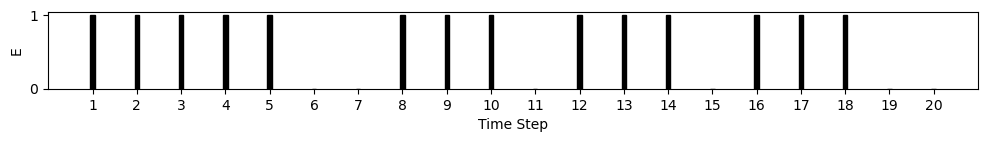

In [43]:
# Generate data with 20 time points and 5 signal points
time_steps = np.arange(1, 21)
signals = np.zeros(20)
signal_indices = [1,2,3,4,5, 8,9,10, 12,13,14, 16,17,18]
signals[np.array(signal_indices) - 1] = 1  # Set signal value to 1 at the specified indices

# Create the plot using bar plot
plt.figure(figsize=(12, 1))
plt.bar(time_steps, signals, color='black', edgecolor='black', width=.1)
plt.xticks(time_steps)  # Ensure x-axis has 1 through 20
plt.yticks([0, 1])
plt.xlabel('Time Step')
plt.ylabel('E')
# Customize the plot


#plt.title('Random Signal Bar Plot with 20 Time Points')

# Customize the plot
#plt.grid(axis='y')
plt.show()


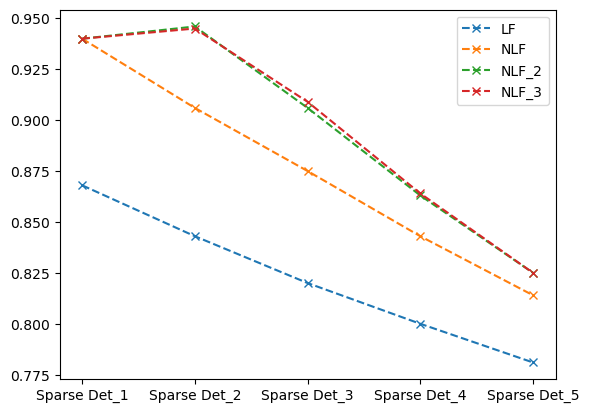

In [39]:
df = pd.DataFrame.from_dict(ideal_dict, orient='index', columns=['LF', 'NLF', 'NLF_2', 'NLF_3'])
plt.plot(df, ls='--', marker='x', label=df.columns)
plt.legend()

# Plot

### Plot all tasks Vs Alg accuracy

In [181]:
import matplotlib.pyplot as plt
#plt.plot(ideal_acc_dict['ATF'], marker='o')
#plt.plot(ideal_acc_dict['FTA'], marker='X')
#plt.plot(ideal_acc_dict['FTAt'], marker='|')
#plot_task_labels
df_ = pd.read_csv('./data/idea_data/ideal_data_sparse.csv')
df_

,Unnamed: 0,LF,NLF,NLF_1,NLF_2,NLF_3
0,Classical,0.947,0.947,0.947,0.947,0.945
1,Sparse Det_1,0.806,0.844,0.844,0.843,0.841
2,Sparse Det_2,0.809,0.843,0.843,0.879,0.877
3,Sparse Det_3,0.828,0.863,0.863,0.905,0.917
4,Sparse Det_4,0.855,0.886,0.886,0.932,0.943
5,Sparse Det_5,0.878,0.909,0.909,0.951,0.961
6,Sparse Det_6,0.900,0.928,0.928,0.964,0.973
7,Sparse Det_7,0.920,0.944,0.944,0.974,0.981
8,Sparse Det_8,0.936,0.957,0.957,0.981,0.986


ValueError: label must be scalar or have the same length as the input data, but found 4 for 10 datasets.

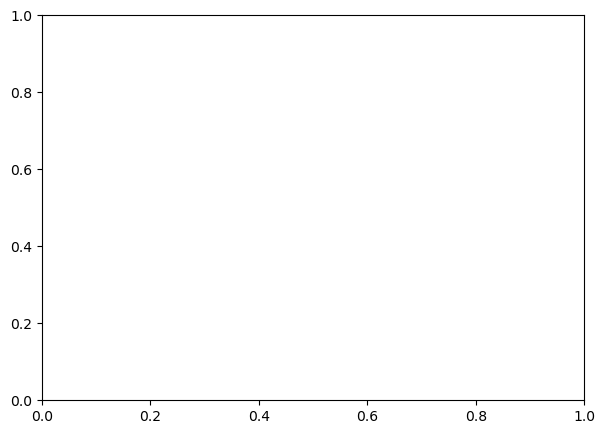

In [182]:
# Visualise
alg_labels = ["LF", "NLF", "NLF_2", "NLF_3"]
plt.figure(figsize=(7,5))
plt.plot(df, marker='o', ms = 5, linestyle='--', label=alg_labels)
plt.legend(frameon=1)
plt.grid()
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.title('Accuracy with 100k trials')
#plt.savefig('./Ideal_acc.png', dpi=300)

In [46]:
data_df.insert(2, 'NLF_2', [94.0, 94.5, 90.6, 86.2, 82.9])
data_df

,LF,NLF,NLF_2,NLF_3
Sparse Det_1,86.7,94.0,94.0,92.2
Sparse Det_2,84.2,90.6,94.5,92.5
Sparse Det_3,82.0,87.5,90.6,90.4
Sparse Det_4,80.0,84.3,86.2,86.0
Sparse Det_5,78.3,81.5,82.9,82.3


### Extract Sparse and Dense tasks

In [20]:
transpose_df = data_df.transpose()
# Filter columns where column names contain 'sparse'
sparse_columns = transpose_df.columns[transpose_df.columns.str.contains('sparse', case=False)]
dense_columns = transpose_df.columns[transpose_df.columns.str.contains('dense', case=False)]


In [21]:
sparse_df = transpose_df[sparse_columns].transpose()
dense_df = transpose_df[dense_columns].transpose()
sparse_df

,ATF,FTA,FTAt
Sparse Det,87.0,94.1,94.0
Sparse Det_1,86.8,94.0,94.0
Sparse Det_2,84.2,90.6,94.5
Sparse Det_3,81.8,87.0,90.2
Sparse Det_4,80.0,84.4,86.4
Sparse Det_5,78.0,81.3,82.4


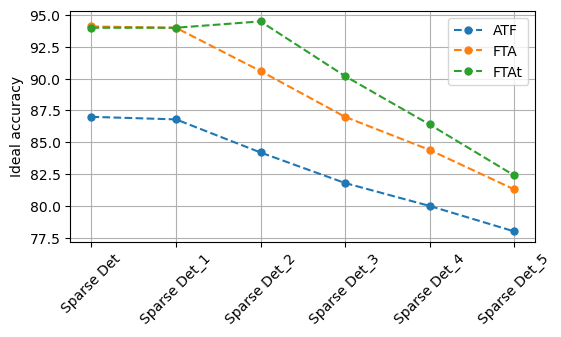

In [23]:
plt.figure(figsize=(6,3))
plt.plot(sparse_df, marker='o', ms = 5, linestyle='--', label=alg_labels)
plt.ylabel('Ideal accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

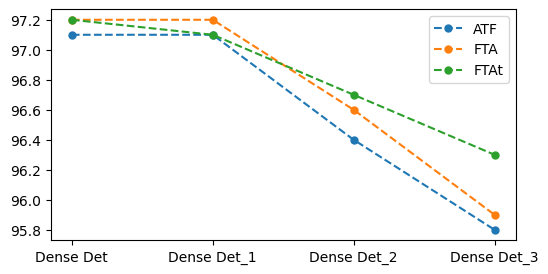

In [24]:
plt.figure(figsize=(6,3))
plt.plot(dense_df, marker='o', ms = 5, linestyle='--', label=alg_labels)
plt.legend()

In [6]:

savepath = 'data/ideal_data/ideal_data_densetasks_k1to5'
outfile = open(save_path, "wb")
pickle.dump(dense_df, outfile)
outfile.close()


NameError: name 'sparse_df' is not defined

In [33]:
sparse_df.rename(columns={'ATF':'LF',
                          'FTA':'NFL',
                          'FTAt':'NLF_2'})

,LF,NFL,NLF_2
Sparse Det,87.0,94.1,94.0
Sparse Det_1,86.8,94.0,94.0
Sparse Det_2,84.2,90.6,94.5
Sparse Det_3,81.8,87.0,90.2
Sparse Det_4,80.0,84.4,86.4
Sparse Det_5,78.0,81.3,82.4


In [44]:
sparse_df

NameError: name 'sparse_df' is not defined

### Alg Vs Accuracy

Text(0, 0.5, 'Accuracy')

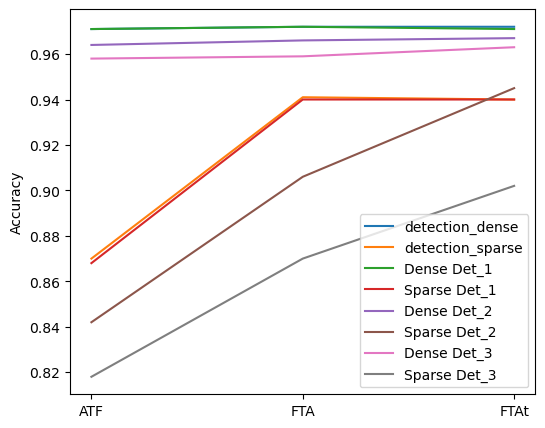

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
for key in ideal_dict:
    plt.plot(ideal_dict[key], label=str(key))
plt.legend()
#plt.ylim(bottom=0.4, top=1)
plt.xticks([0,1,2], ['ATF', 'FTA', 'FTAt'])
plt.ylabel('Accuracy')